<a href="https://colab.research.google.com/github/Swara-24/Explainable-AI/blob/main/DataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS**


FEATURES OF DATASET
1.	patient_id : Assigns an identification number to every patient who was tested COVID19 positive
2. global_num	- the number given by KCDC
3.	sex : Gives the information about the patient’s gender 
4.	birth_year : The year in which the patient was born.
5.	Age : Range of age of the person. (Eg: if a person’s age is 25, he would lie in 20s)
6.	Country : Country to which the patient belongs
7.	Province : Province to which the patient belongs
8.	City : City to which the patient belongs 
9.	Disease : TRUE: underlying disease / FALSE: no disease
10.	infection_case : Cause of the infection
11.	infection_order: the number related to spreading order (Eg: 1 for the super spreader, 2 for the person affected by 1, etc)
12.	infected_by: the id of the patient that affected this person
13.	contact_no : the no. of people this patient came in contact with
14.	symptom_onset_date : the date showing the onset of symptoms
15.	confirmed_date : the date on which the person tested positive
16.	released_date : the date on which the patient was released from the isolation center
17.	deceased_date : the date on which the patient died
18.	state : the current state of the person (isolated,released,deceased)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/drive')
# Link for dataset
# https://www.kaggle.com/kimjihoo/coronavirusdataset?select=PatientInfo.csv
data = pd.read_csv('/drive/My Drive/Colab Notebooks/DataSet.csv')
# To display the top 5 rows
data.head(5)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
data.shape

(4004, 18)

The data consists of 4004 rows and 18 columns.

In [ ]:
data.info

<bound method DataFrame.info of       patient_id  global_num     sex  ... released_date deceased_date     state
0     1000000001         2.0    male  ...    2020-02-05           NaN  released
1     1000000002         5.0    male  ...    2020-03-02           NaN  released
2     1000000003         6.0    male  ...    2020-02-19           NaN  released
3     1000000004         7.0    male  ...    2020-02-15           NaN  released
4     1000000005         9.0  female  ...    2020-02-24           NaN  released
...          ...         ...     ...  ...           ...           ...       ...
3999  7000000010         NaN  female  ...    2020-04-21           NaN  released
4000  7000000011         NaN    male  ...           NaN           NaN  isolated
4001  7000000012         NaN  female  ...    2020-05-05           NaN  released
4002  7000000013         NaN  female  ...    2020-04-26           NaN  released
4003  7000000014         NaN  female  ...           NaN           NaN  isolated

[4004 r

The detailed info of data.

In [ ]:
data.dtypes

patient_id              int64
global_num            float64
sex                    object
birth_year             object
age                    object
country                object
province               object
city                   object
disease                object
infection_case         object
infection_order       float64
infected_by            object
contact_number         object
symptom_onset_date     object
confirmed_date         object
released_date          object
deceased_date          object
state                  object
dtype: object

The data types of various columns.

## ***Cleaning data*** 

In [ ]:
data.isnull().sum()

patient_id               0
global_num            1198
sex                    330
birth_year             737
age                    479
country                  0
province                 0
city                    78
disease               3986
infection_case         793
infection_order       3973
infected_by           3105
contact_number        3324
symptom_onset_date    3469
confirmed_date           3
released_date         2496
deceased_date         3939
state                    0
dtype: int64

The sum of null values are depicted above.

In [ ]:
data.drop(columns='disease')
#since the value was empty in almost all records, the column is dropped

,patient_id,global_num,sex,birth_year,age,country,province,city,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released


In [ ]:
data['age_range_numeric'] = data.age.str[:2]
#extracting the numeric range from age and converting it to float
data.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,age_range_numeric
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,50
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,30
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,50
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,20
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,20


In [ ]:
def stringremover(doc):
    l = doc.split()
    for i in l:
        try:
            num = float(i)
            return num
        except:
            continue

In [ ]:
contactn=[]
data['contact_number'] = data['contact_number'].fillna("0.0")
for i in range(len(data['contact_number'])):
    doc = data['contact_number'][i]
    res = stringremover(doc)
    contactn.append(res)
data['contact_number']=contactn

In [ ]:
age = []
data['age_range_numeric'] = data['age_range_numeric'].fillna("0.0")
for i in range(len(data['age_range_numeric'])):
    doc = data['age_range_numeric'][i]
    res = stringremover(doc)
    age.append(res)
data['age_range_numeric'] = age


In [ ]:
data.drop(data[data['age'] == "0s"].index, inplace = True)
data.drop(data[data['age_range_numeric'] == 0.0].index, inplace = True)
data.drop(data[data['contact_number'] == 0.0].index, inplace = True)

## ***UNIVARIATE ANALYSIS***

ANALYSIS ON INFECTION CASE

In [ ]:
data['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'Onchun Church', 'etc', 'Shincheonji Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten', nan,
       'gym facility in Cheonan', 'gym facility in Sejong',
       'Ministry of Oceans and Fisheries', 'Itaewon Clubs',
       'River of Grace Community Church'], dtype=object)

This is the list of factors of infection.

Text(0, 0.5, 'count')

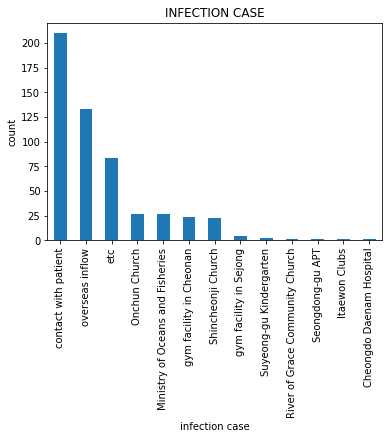

In [ ]:
data.infection_case.value_counts().plot.bar()
plt.title("INFECTION CASE")
plt.xlabel("infection case")
plt.ylabel("count")

The graph shows the various infection cases from which people got infected and their respective frequency.
On analyzing the infection case, it can be observed that more number of patients are affected by coming in contact with the other patients followed by overseas inflow

ANALYSIS ON GENDER

Text(0.5, 1.0, 'Gender ratio')

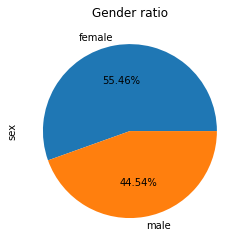

In [ ]:
data.sex.value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Gender ratio")

The plot gives us an understanding of sex ratio of patients. It can be noticed that nearly equal number of men and women are becoming victim of this pandemic.

ANALYSIS ON CITY

In [ ]:
data['city'].unique()

array(['Gangseo-gu', 'Jungnang-gu', 'Jongno-gu', 'Mapo-gu', 'Seongbuk-gu',
       'Songpa-gu', 'Seodaemun-gu', 'Seongdong-gu', 'Dongjak-gu', 'etc',
       'Gangnam-gu', 'Dongnae-gu', 'Haeundae-gu', nan, 'Buk-gu', 'Nam-gu',
       'Seo-gu', 'Geumjeong-gu', 'Saha-gu', 'Suyeong-gu', 'Sasang-gu',
       'Busanjin-gu', 'Yeonje-gu', 'Gijang-gun', 'Dong-gu', 'Yuseong-gu',
       'Daedeok-gu', 'Sejong', 'Goyang-si', 'Pyeongtaek-si', 'Bucheon-si',
       'Suwon-si', 'Guri-si', 'Siheung-si', 'Anyang-si', 'Gimpo-si',
       'Seongnam-si', 'Yongin-si', 'Namyangju-si', 'Gwangju-si',
       'Anseong-si', 'Gwacheon-si', 'Dongducheon-si', 'Gunpo-si',
       'Wonju-si', 'Hoengseong-gun', 'Cheorwon-gun', 'Gyeryong-si',
       'Cheonan-si', 'Asan-si', 'Seosan-si', 'Hongseong-gun', 'Buyeo-gun',
       'Seocheon-gun', 'Nonsan-si', 'Gongju-si', 'Gunsan-si',
       'Suncheon-si', 'Yeosu-si', 'Gwangyang-si', 'Hwasun-gun',
       'Mokpo-si', 'Muan-gun', 'Gyeongsan-si', 'Yeongju-si', 'Jeju-do'],
      dtype=obj

In [ ]:
data['city'].nunique()

65

There are total 65 cities from which people are affected.

Text(0, 0.5, 'city')

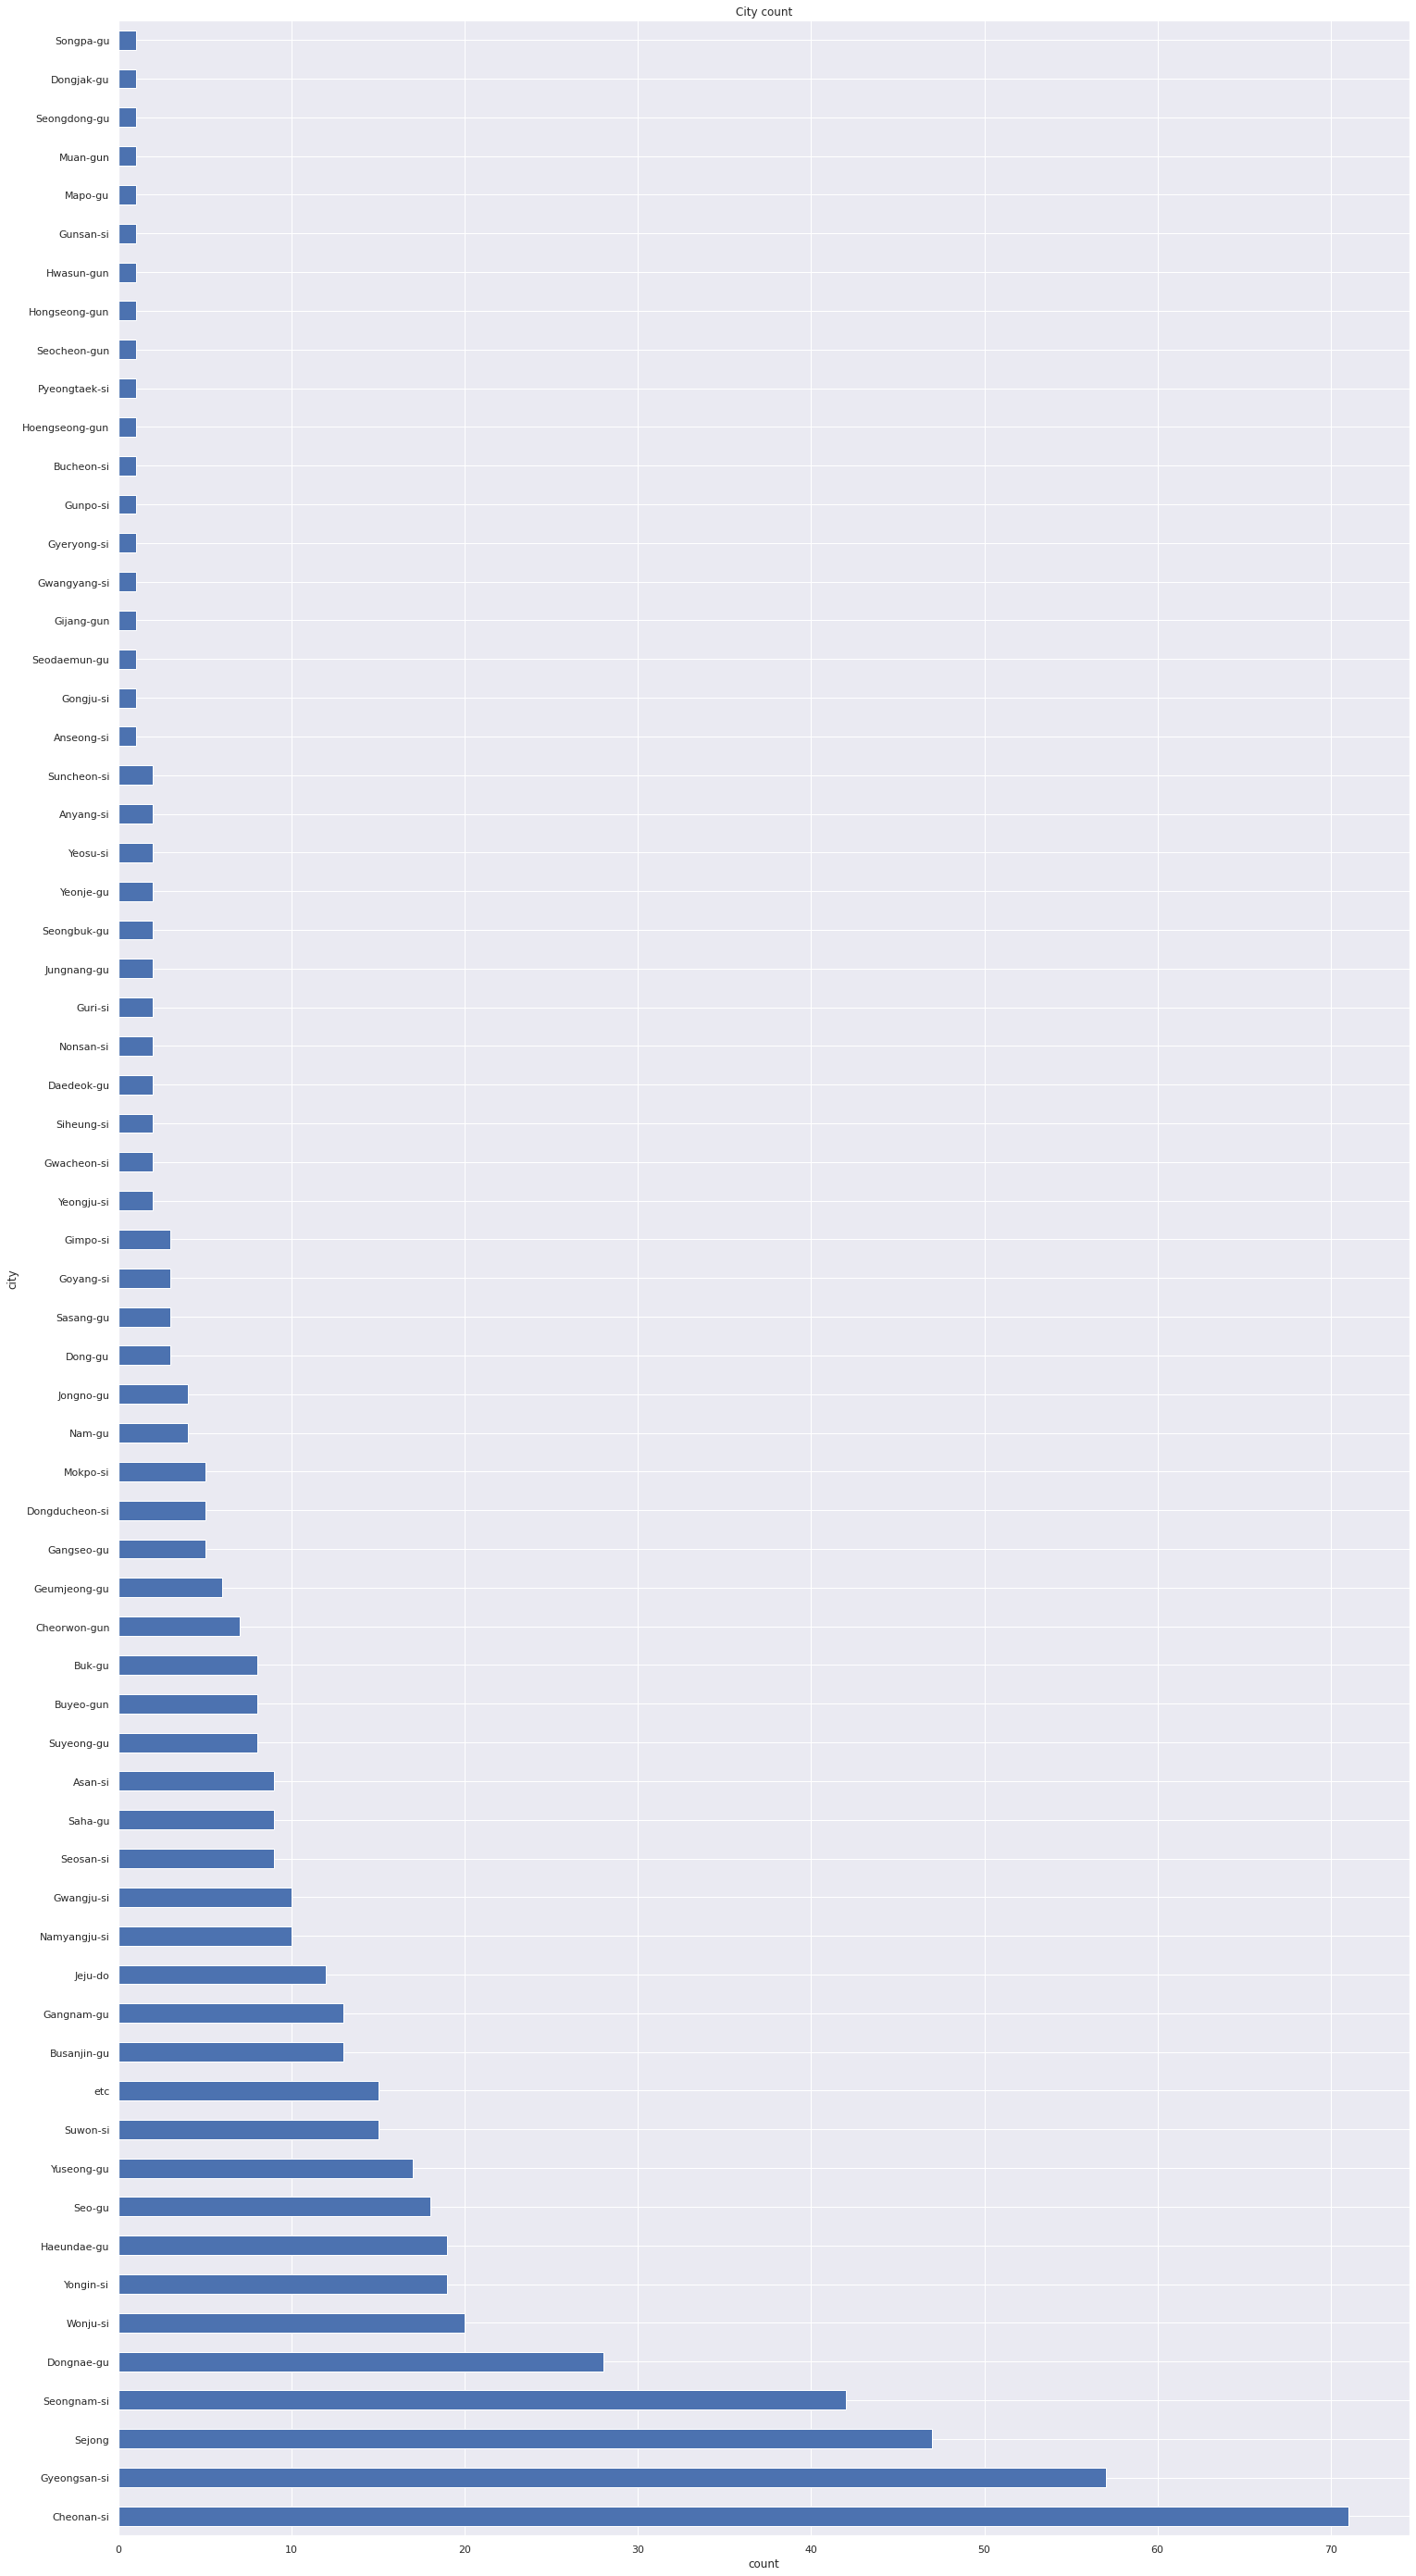

In [ ]:
plt.figure(figsize=(25,50))
data.city.value_counts().plot(kind='barh')
plt.title("City count")
plt.xlabel("count")
plt.ylabel("city")

The above bar graph represents the number of people affected city wise.
It can be observed that Songpa-gu is the least affected and Cheonan-si  is the most affected(approx 70 people).

ANALYSIS ON COUNTRY

Text(0, 0.5, 'count')

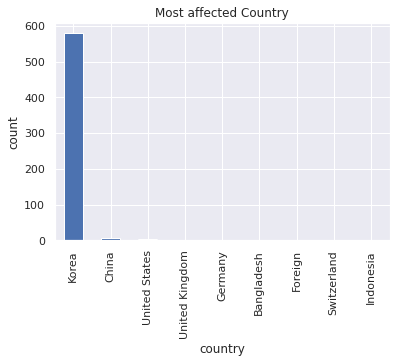

In [ ]:
data.country.value_counts().plot.bar()
plt.title("Most affected Country")
plt.xlabel("country")
plt.ylabel("count")

The graph shows - Country wise no. of patients. Korea is the most affected country which can be observed on the Y-axis. The number of people from other countries are almost negligible probably because the survey was conducted in Korea.

ANALYSIS ON STATE

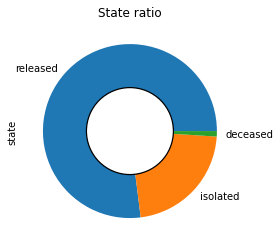

In [ ]:
plt.title("State ratio")
data.state.value_counts().plot.pie()
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

The donut plot gives information about the number of patients released, deceased and isolated. It can be seen that more number of patients are released from the isolation center, then comes the number of patients being isolated and very less number of patients died.

ANALYSIS ON AGE

Text(0.5, 0, 'Age range')

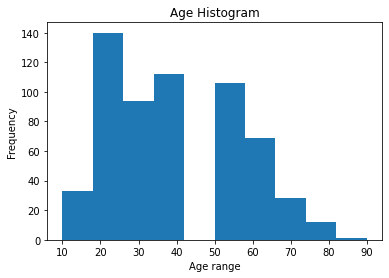

In [ ]:
data.age_range_numeric.plot.hist()
plt.title("Age Histogram")
plt.xlabel("Age range")

It can be observed that people who belong to the age in the range of 20’s are most affected.There is nobody affected in the range of 40 to 50.

Text(0.5, 1.0, 'Age distribution plot')

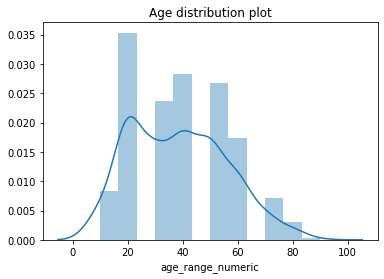

In [ ]:
sns.distplot(data['age_range_numeric'])
plt.title("Age distribution plot")

The graph shows the propbability of the ages and the line in the graph the maximum concentration in that particular range.

ANALYSIS ON BIRTH YEAR

Text(0, 0.5, 'birth year')

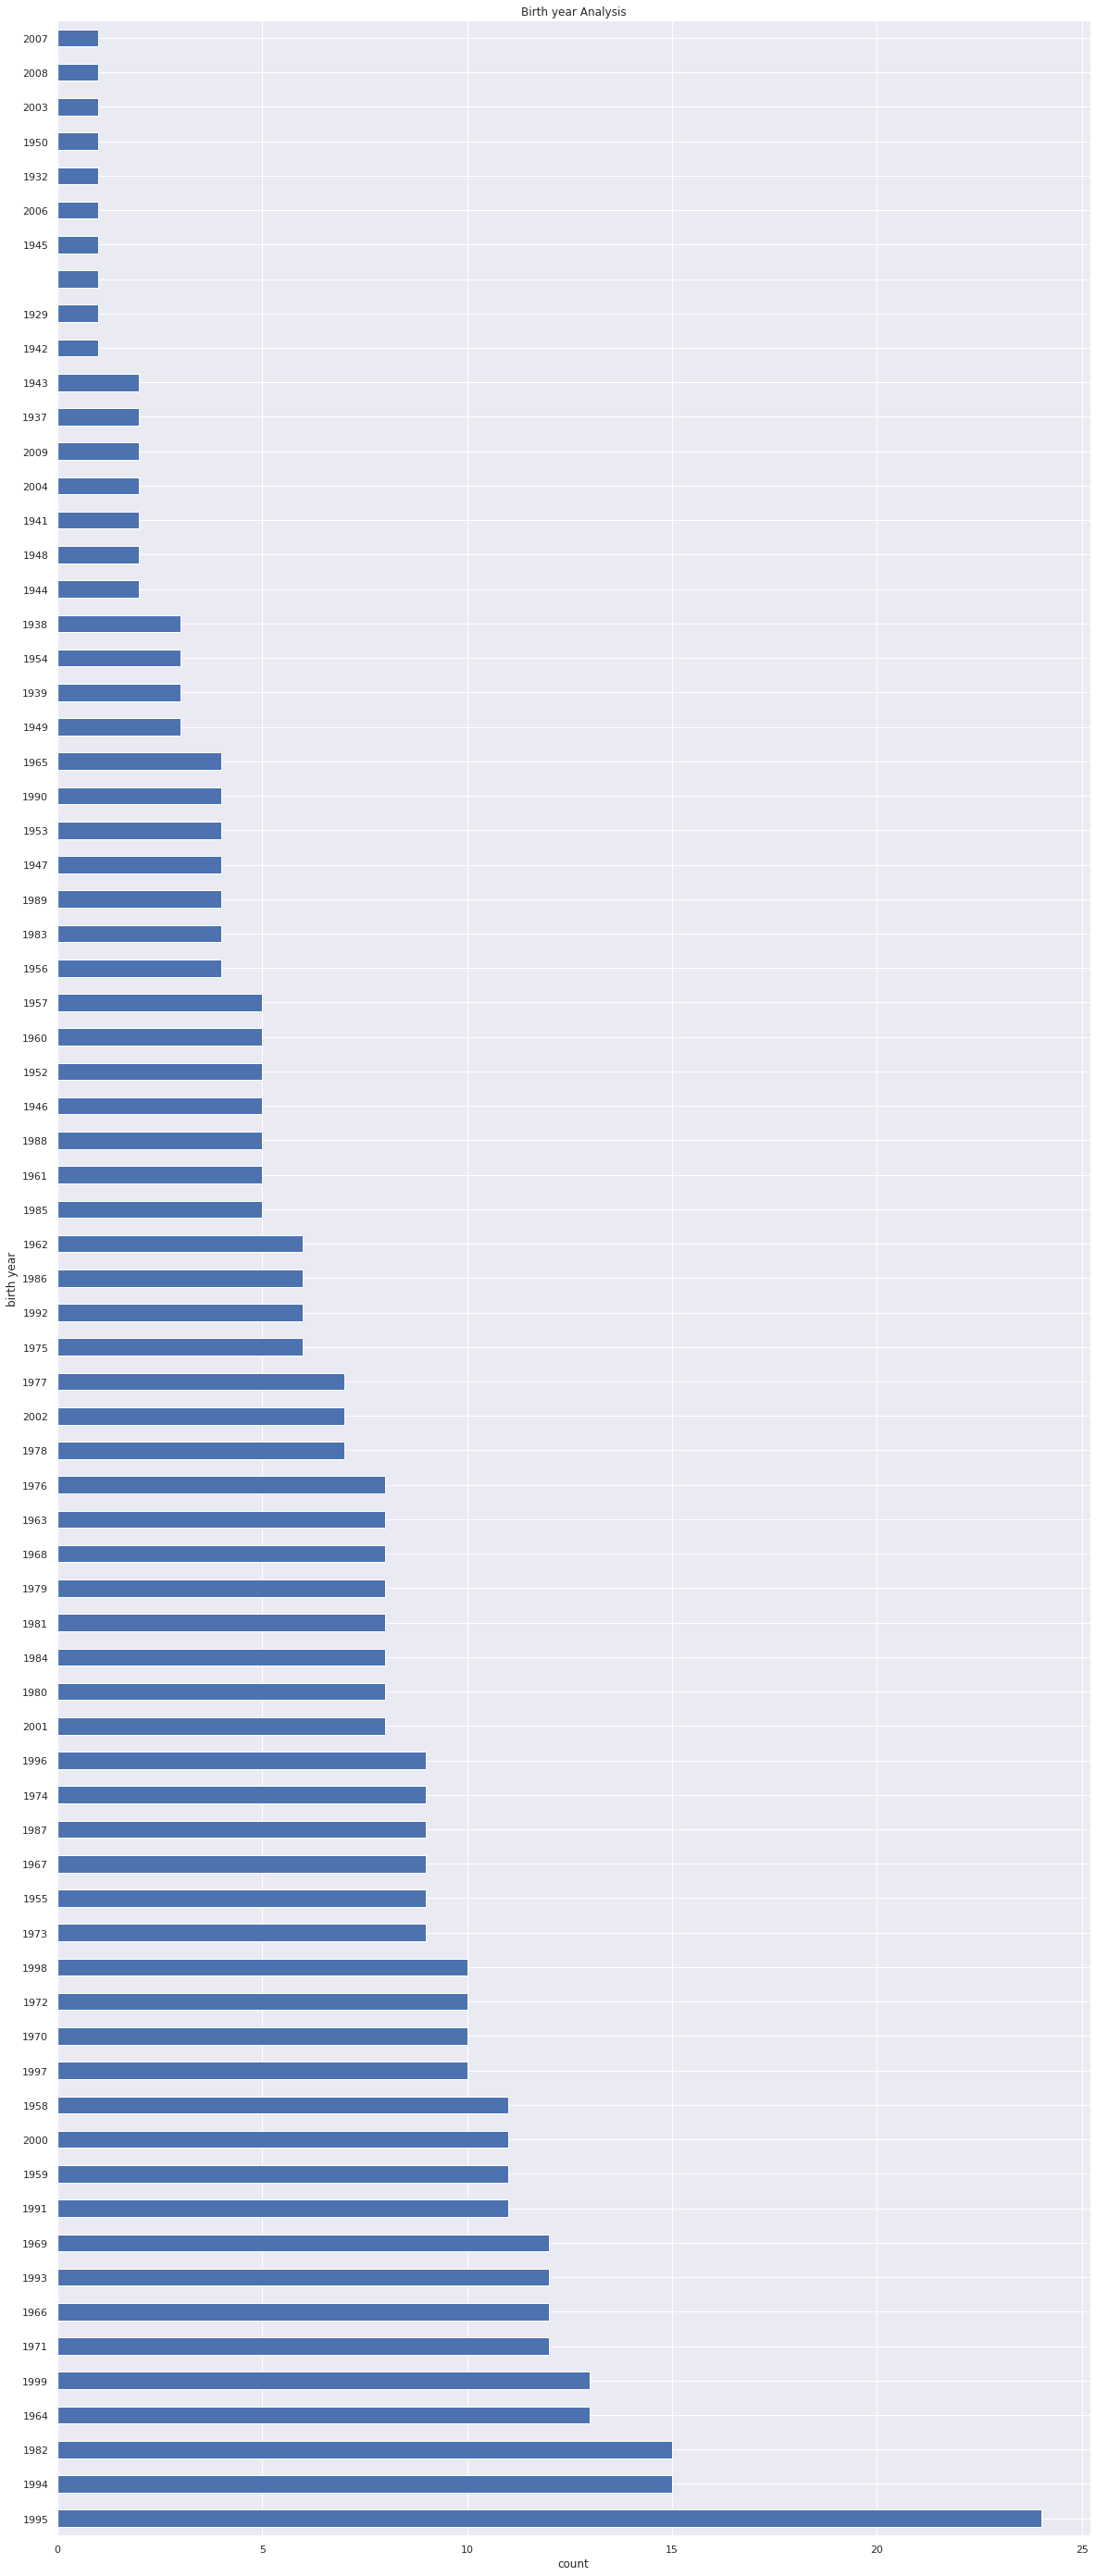

In [ ]:
plt.figure(figsize=(20,50))
data.birth_year.value_counts().plot(kind='barh')
plt.title("Birth year Analysis")
plt.xlabel("count")
plt.ylabel("birth year")

The above graph shows how the birth year ie. indirectly the age affects the number of patients. People who are born in the year 1995 are the one’s who are most affected.

Text(0, 0.5, 'Count')

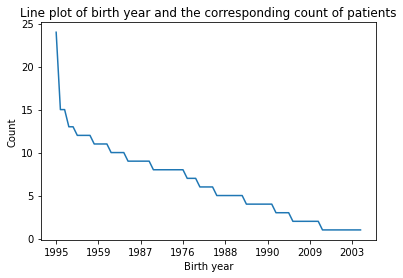

In [ ]:
data.birth_year.value_counts().plot.line()
plt.title("Line plot of birth year and the corresponding count of patients")
plt.xlabel("Birth year")
plt.ylabel("Count")

From the above 2 graphs, the number of people for every birth year can be interpreted. Old people are more affected as compared to young ones.

ANALYSIS ON PROVINCE

Text(0.5, 1.0, 'Province with the respective patient count')

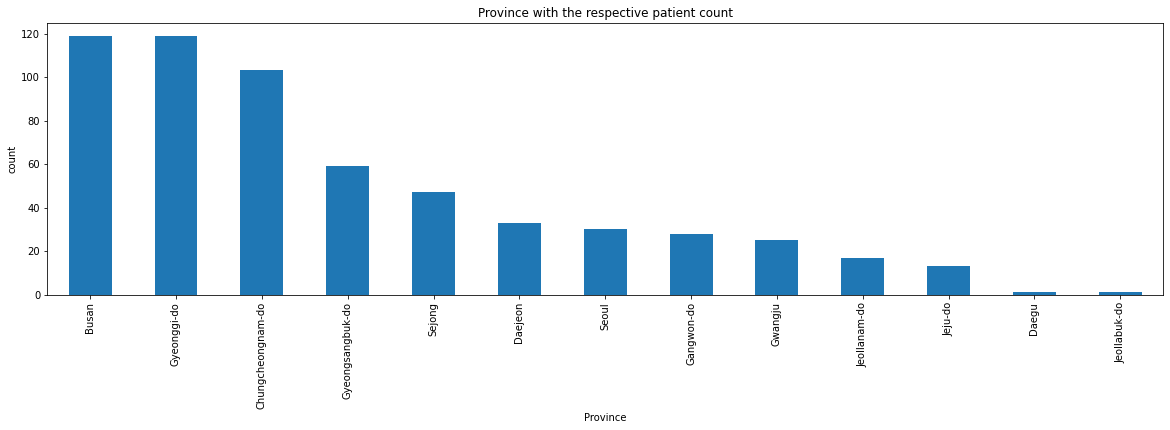

In [ ]:
plt.figure(figsize=(20,5))
data.province.value_counts().plot.bar()
plt.xlabel("Province")
plt.ylabel("count")
plt.title("Province with the respective patient count")

Gyeonggi-do is the most affected province while Jeju-do is least affected. The graph is clearly decreasing in nature.

ANALYSIS ON INFECTION ORDER

Text(0, 0.5, 'count')

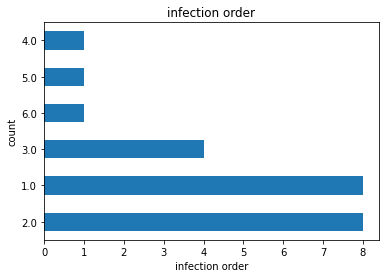

In [ ]:
data.infection_order.value_counts().plot(kind='barh')
plt.title("infection order")
plt.xlabel("infection order")
plt.ylabel("count")

This shows that the spreading of infection order is maximum for the infection order=1 and 2

Text(0.5, 1.0, 'Boxplot - infection order')

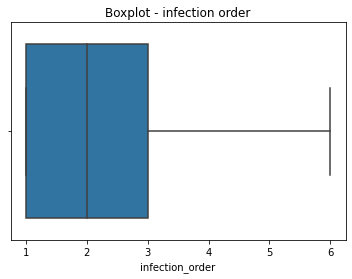

In [ ]:
sns.boxplot(data['infection_order'])
plt.title("Boxplot - infection order")

The boxplot gives us the information about min max median 25 percentile and 75 percentile.
Here we have used it for the infection order statistics.

It is seen that:
The max infection order is 6. Minimum is 1. Median is 2.

ANALYSIS ON CONTACT NUMBER

Text(0.5, 1.0, 'The count of Number of people patients made contact with')

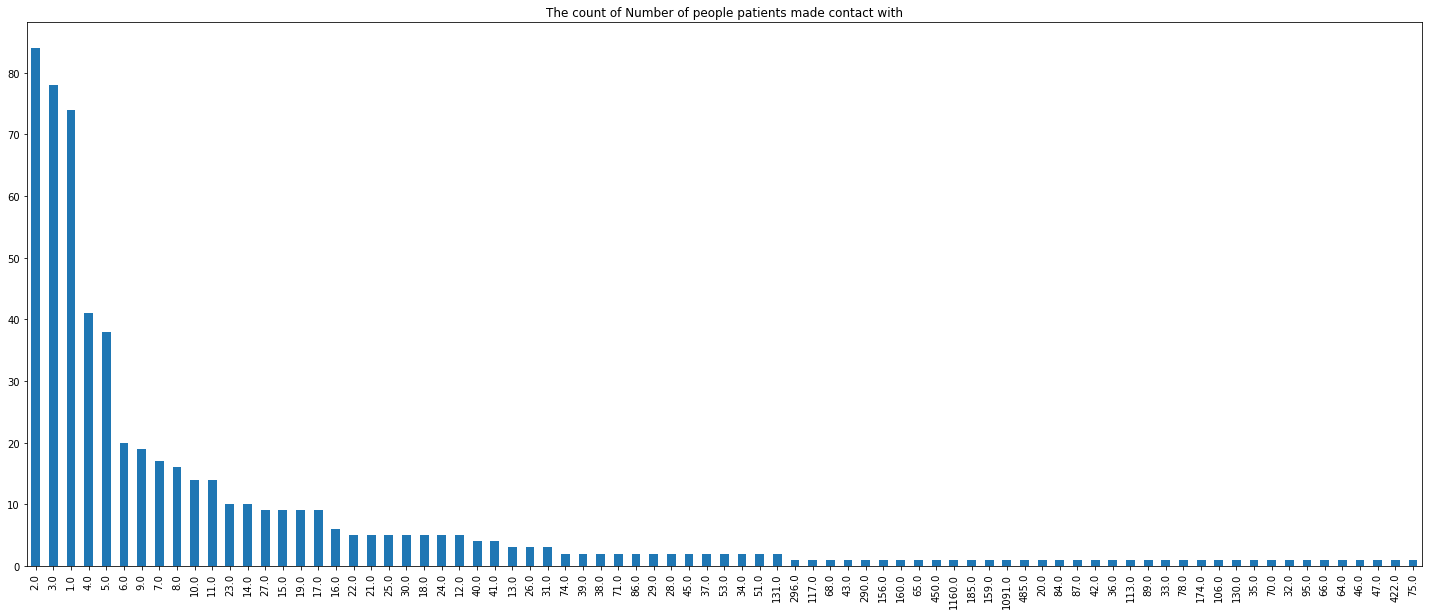

In [ ]:
plt.figure(figsize=(25,10))
data.contact_number.value_counts().plot.bar()
plt.title("The count of Number of people patients made contact with")

This shows that most of the patients made contact with at least 2 people.

CONVERTING CATEGORICAL TO NUMERICAL VARIABLES

In [ ]:
data["infection_case"] = data["infection_case"].astype('category')
data["infection_case"] = data["infection_case"].cat.codes
data.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,age_range_numeric
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,12,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,50.0
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,12,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,30.0
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,8,2.0,2002000001,17.0,NaN,2020-01-30,2020-02-19,NaN,released,50.0
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,12,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,20.0
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,8,2.0,1000000002,2.0,NaN,2020-01-31,2020-02-24,NaN,released,20.0


In [ ]:
data.describe()

,patient_id,global_num,infection_case,infection_order,contact_number,age_range_numeric
count,5.950000e+02,292.000000,595.000000,23.000000,591.000000,595.000000
mean,2.698096e+09,5634.434932,7.640336,2.217391,20.685279,38.453782
std,1.734305e+09,4081.439525,3.858401,1.346933,77.149464,17.348550
min,1.000000e+09,2.000000,-1.000000,1.000000,1.000000,10.000000
25%,1.150000e+09,892.750000,8.000000,1.000000,2.000000,20.000000
50%,2.000000e+09,7501.500000,8.000000,2.000000,5.000000,40.000000
75%,4.100000e+09,9239.250000,10.000000,3.000000,16.000000,50.000000
max,7.000000e+09,11436.000000,12.000000,6.000000,1160.000000,90.000000


## ***BIVARIATE ANALYSIS***

Text(0.5, 1.0, 'Male vs Female wrt Contact number')

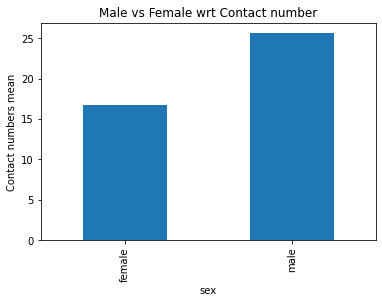

In [ ]:
data.groupby('sex')['contact_number'].mean().plot.bar()
plt.ylabel("Contact numbers mean")
plt.title("Male vs Female wrt Contact number")

The graph gives us an idea of the gender wise mean of the number of people who came in contact with patients. The males have greater contact numbers that means the number of people who came in contact with males is higher than in female.

Text(0.5, 1.0, 'Male vs Female wrt Infection order')

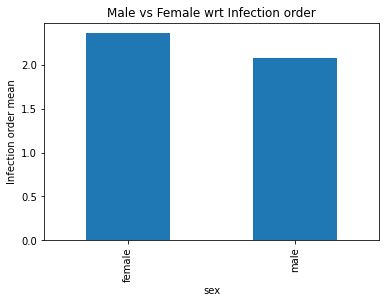

In [ ]:
data.groupby('sex')['infection_order'].mean().plot.bar()
plt.ylabel("Infection order mean")
plt.title("Male vs Female wrt Infection order")

It gives us a clear interpretation of who has greter infection order. The infection order is greater in males than in females.

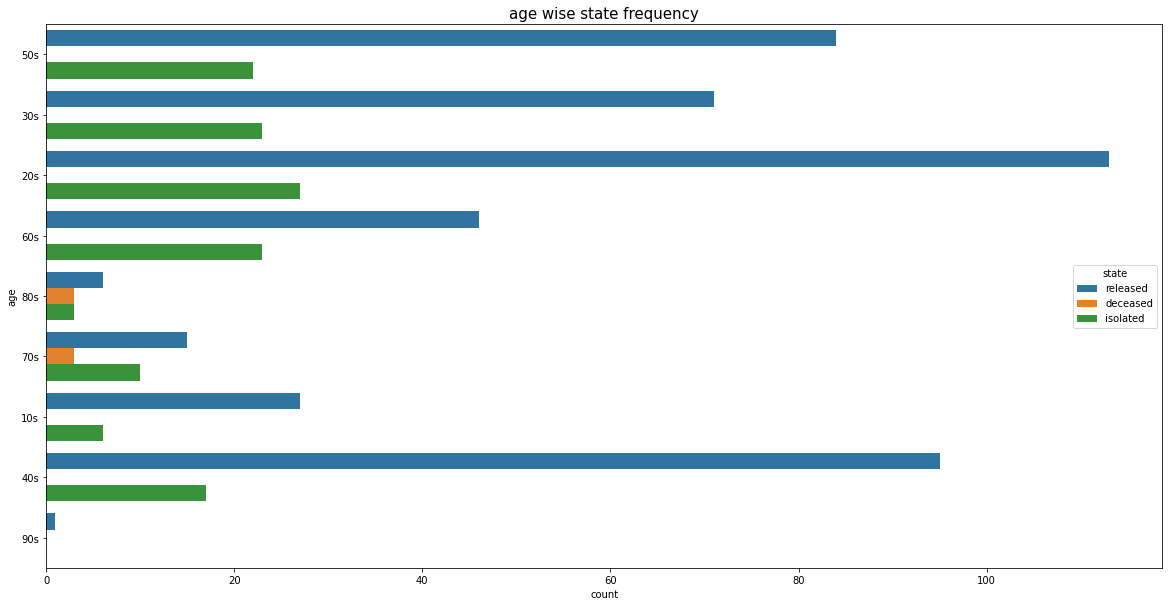

In [ ]:
plt.figure(figsize=(20,10))
plt.title('age wise state frequency',fontsize = 15)
sns.countplot(y='age', hue='state',data=data)

This graph depicts that most of the people in their 20's are released or are isolated while the maximum number of deceased people were in their 70s and 80s  

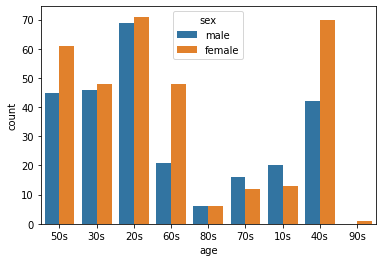

In [ ]:
sns.countplot(data=data, x='age', hue='sex')
plt.title("age wise sex ratio")

This shows that how many male and female are there in a particular age range. The maximum number of males and females who were tested COVID19 are in their 20s. Also, in almost every age group there are more females affected than males.

In [ ]:
data['released_date'] = pd.to_datetime(data['released_date'], format='%Y-%m-%d')

In [ ]:
data['confirmed_date'] = pd.to_datetime(data['confirmed_date'], format='%Y-%m-%d')

In [ ]:
data['deceased_date'] = pd.to_datetime(data['deceased_date'], format='%Y-%m-%d')

Text(0.5, 1.0, 'Scatter plot of confirmed and released date of patient')

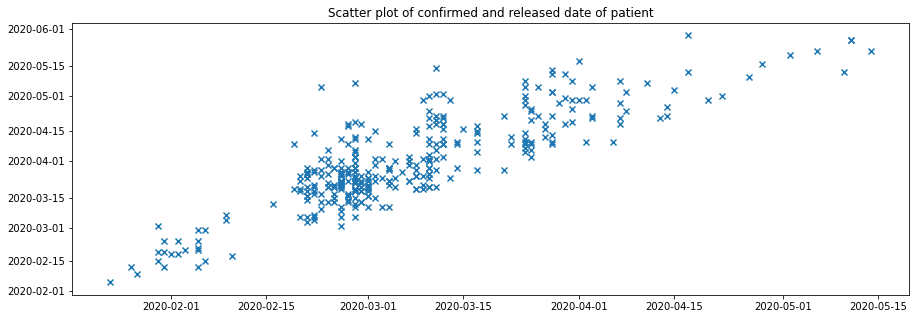

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(data['confirmed_date'],data['released_date'],marker='x')
plt.title("Scatter plot of confirmed and released date of patient")

There were a lot of people released between 15 Feb and 15 March.

In [ ]:
data.corr()

,patient_id,global_num,infection_case,infection_order,contact_number,age_range_numeric
patient_id,1.000000,-0.384366,-0.364768,-0.162539,-0.085365,0.022884
global_num,-0.384366,1.000000,0.618612,0.662540,-0.192960,-0.044095
infection_case,-0.364768,0.618612,1.000000,-0.677365,-0.000911,-0.089809
infection_order,-0.162539,0.662540,-0.677365,1.000000,-0.074453,0.440293
contact_number,-0.085365,-0.192960,-0.000911,-0.074453,1.000000,-0.029210
age_range_numeric,0.022884,-0.044095,-0.089809,0.440293,-0.029210,1.000000


The above matrix shows all the possible correlations between numerical variables.

Negative correlation is a relationship between 2 variables in which as one variable increases, the other decreases and vice versa.
A perfect negative correlation is -1, a 0 indicates no correlation, and a +1 indicates a perfect positive correlation.

### Heatmap to show the relationships of the variables using Correlation Matrix 

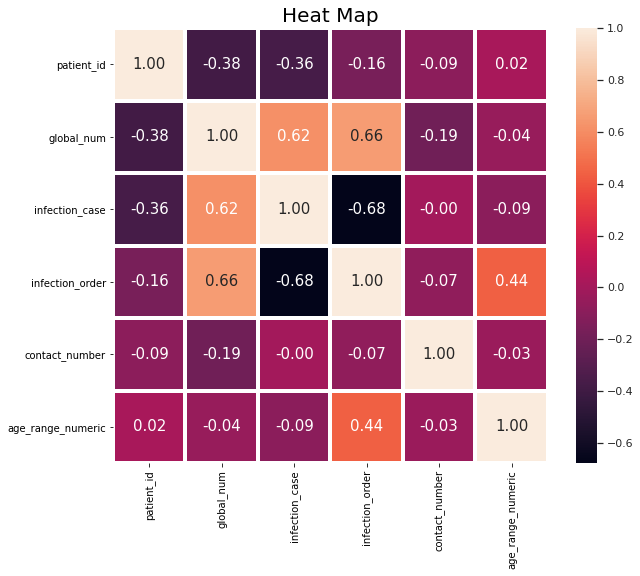

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Heat Map', fontsize=20)
sns.set(font_scale=1.0)
sns.heatmap(data.corr(), cbar=True, annot =True, square=True, fmt='.2f',annot_kws={'size':15}, linewidth=3)